
# Visualization of Water Quality Index (WQI)

This notebook is focused on visualizing the Water Quality Index (WQI) across different regions and time periods.
Using scatter plots, heatmaps, and geographical visualizations, we explore trends in water quality and identify critical areas.

## Steps Covered:
1. Loading the preprocessed WQI data
2. Preparing the data for visualization (handling geographical coordinates)
3. Plotting the WQI values on geographical maps
4. Generating temporal heatmaps for visual insights


In [1]:
import pandas as pd
import re
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
data = pd.read_csv('/content/AWQI_India_2012.csv')
print(data.head())

      LATITUDE    LONGITUDE     PH      TH     CA      MG  CHLORIDE  SULPHATE  \
0  11°42'31" N   92°39'0" E  100.0   67.50  100.0   59.43     100.0     100.0   
1  11°42'20" N  92°42'57" E  100.0  100.00  100.0  100.00     100.0     100.0   
2  11°40'12" N  92°41'58" E  100.0   86.25  100.0   97.61     100.0     100.0   
3  11°40'16" N  92°41'55" E  100.0   78.75  100.0   73.33     100.0     100.0   
4  11°43'48" N  92°40'48" E  100.0   80.00  100.0   80.27     100.0     100.0   

   NITRATE  FLUORIDE    AWQI  
0    100.0     100.0   75.69  
1    100.0     100.0  100.00  
2    100.0     100.0   90.67  
3    100.0     100.0   84.10  
4    100.0     100.0   85.38  


In [3]:
# Function to convert coordinates from DMS (Degrees, Minutes, Seconds) format to decimal degrees
def dms_to_decimal(dms_str, default_direction=None):
    # Match degrees, minutes, seconds, and optional hemisphere
    dms_regex = re.match(r"(\d+)°(\d+)'([\d.]+)\"? ?([NSEW]?)", dms_str.strip())

    if dms_regex:
        degrees = int(dms_regex.group(1))
        minutes = int(dms_regex.group(2))
        seconds = float(dms_regex.group(3))
        # Use captured direction if present, otherwise apply the default
        direction = dms_regex.group(4) if dms_regex.group(4) else default_direction

        # Calculate decimal degrees
        decimal = degrees + minutes / 60 + seconds / 3600

        # For South and West coordinates, negate the decimal value
        if direction in ['S', 'W']:
            decimal *= -1

        return decimal
    else:
        raise ValueError(f"Invalid DMS format: {dms_str}")


In [4]:
# Function to normalize and convert coordinates for consistency
def convert_coordinate(coord_str, default_direction):
    # Check if it's already in decimal format (by checking for a decimal point)
    try:
        # If it can be converted to a float, it's already in decimal
        return float(coord_str)
    except ValueError:
        try:
        # If it's not a float, assume it's in DMS format and convert
         return dms_to_decimal(coord_str, default_direction)
        except ValueError:
          return None

In [5]:
data['Latitude_Decimal'] = data['LATITUDE'].apply(lambda x: convert_coordinate(x, 'N'))
data['Longitude_Decimal'] = data['LONGITUDE'].apply(lambda x: convert_coordinate(x, 'E'))

In [6]:
data = data.dropna(subset=['Latitude_Decimal', 'Longitude_Decimal'])

In [7]:
print(data['Latitude_Decimal'])
print(data['Longitude_Decimal'])

0       11.708611
1       11.705556
2       11.670000
3       11.671111
4       11.730000
          ...    
8317    22.250000
8318    22.483333
8319    22.416667
8320    22.122222
8321    22.199167
Name: Latitude_Decimal, Length: 8322, dtype: float64
0       92.650000
1       92.715833
2       92.699444
3       92.698611
4       92.680000
          ...    
8317    87.295833
8318    87.108333
8319    87.313889
8320    87.369722
8321    87.321389
Name: Longitude_Decimal, Length: 8322, dtype: float64


In [8]:
data = data.reset_index(drop=True)

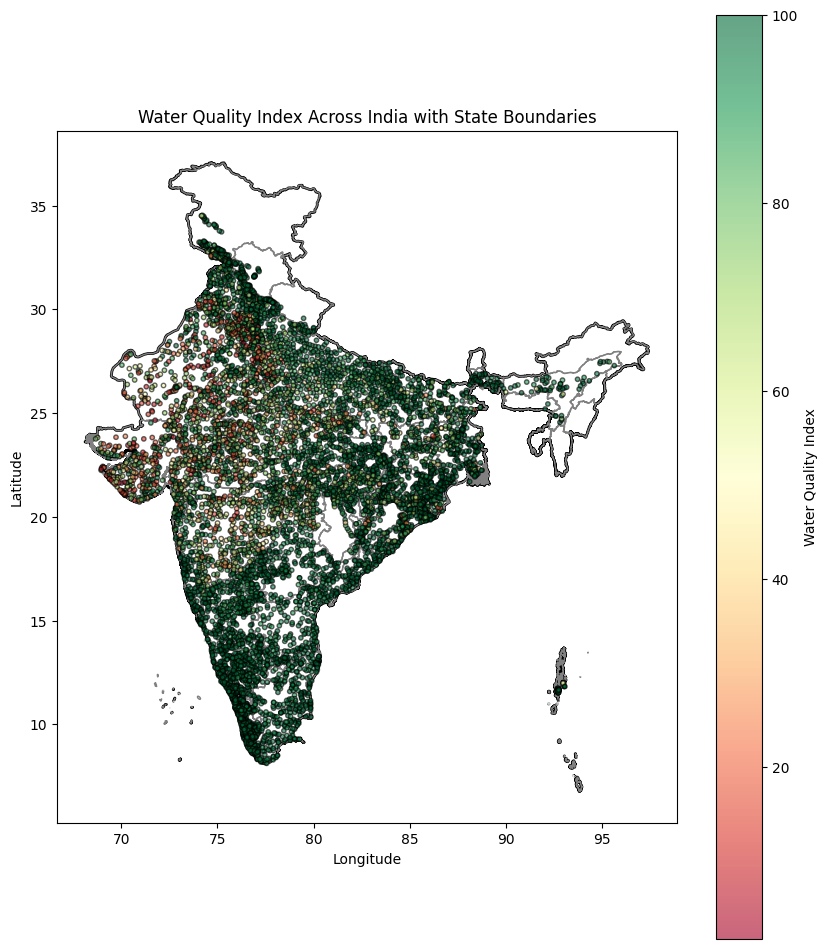

In [13]:
# Load country and state boundary shapefiles and ensure they are in the same CRS
country_boundary_path = '/content/IndiaBoundary.shp'
state_boundary_path = '/content/India-States.shp'

# Load geographical shapefiles for the country and state boundaries
country_boundary = gpd.read_file(country_boundary_path).to_crs(epsg=4326)
# Load geographical shapefiles for the country and state boundaries
state_boundary = gpd.read_file(state_boundary_path).to_crs(epsg=4326)

# Plot the geographical boundaries of the regions or states
# Create a figure and axis with matplotlib
fig, ax = plt.subplots(figsize=(10, 12))

# Plot the country boundary
# Plot the geographical boundaries of the regions or states
country_boundary.plot(ax=ax, edgecolor="black", linewidth=2, facecolor="none")

# Plot state boundaries
# Plot the geographical boundaries of the regions or states
state_boundary.plot(ax=ax, edgecolor="grey", linewidth=1, facecolor="none")

# Normalize the water quality index values for proportional circle sizing
max_index = data['AWQI'].max()
min_index = data['AWQI'].min()

# Create a scatter plot to visualize WQI values at specific geographical locations
# Plot the points using scatter and color them by index
scatter = ax.scatter(
    data['Longitude_Decimal'], data['Latitude_Decimal'],
    c=data['AWQI'],  # Color based on index
    s = 10,
    cmap='RdYlGn', alpha=0.6, edgecolor="k"
)

# Add color bar for the water quality index
# Create a scatter plot to visualize WQI values at specific geographical locations
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical")
cbar.set_label("Water Quality Index")

# Set labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Water Quality Index Across India with State Boundaries")

# Display the plot to the user
plt.show()
